# Practice Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
print("Given Dataset :-","\n","-"*85)
df=pd.read_csv("Practice Dataset.csv")
df.head()

Given Dataset :- 
 -------------------------------------------------------------------------------------


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# First we perform Data Cleaning

Checking for unknown values in each column and replacing with the mode :

In [4]:
df.groupby('job').count().age

job
admin.           107
blue-collar      126
entrepreneur      19
housemaid         12
management        43
retired           22
self-employed     22
services          43
student            8
technician        79
unemployed        14
unknown            3
Name: age, dtype: int64

Here 3 unknown values present,We will replace those by mode(blue-collar).

In [5]:
df['job'].replace('unknown','blue-collar',inplace=True)
df.groupby('job').count().age

job
admin.           107
blue-collar      129
entrepreneur      19
housemaid         12
management        43
retired           22
self-employed     22
services          43
student            8
technician        79
unemployed        14
Name: age, dtype: int64

In [6]:
df.groupby('marital').count().age

marital
divorced     69
married     306
single      121
unknown       2
Name: age, dtype: int64

Here 2 unknown values present, we will replace those by (married)

In [7]:
df['marital'].replace('unknown','married',inplace=True)
df.groupby('marital').count().age

marital
divorced     69
married     308
single      121
Name: age, dtype: int64

In [8]:
df.groupby('education').count().age

education
basic.4y                52
basic.6y                23
basic.9y                76
high.school            111
professional.course     65
university.degree      150
unknown                 21
Name: age, dtype: int64

Here 21 unknown values present, we will replace those by(university.degree)

In [9]:
df['education'].replace('unknown','university.degree',inplace=True)
df['education'].replace('basic.4y','basic',inplace=True)
df['education'].replace('basic.6y','basic',inplace=True)
df['education'].replace('basic.9y','basic',inplace=True)
df.groupby('education').count().age

education
basic                  151
high.school            111
professional.course     65
university.degree      171
Name: age, dtype: int64

In [10]:
df.groupby('housing').count().age

housing
no         215
unknown     13
yes        270
Name: age, dtype: int64

Here 13 unknown values are present, we will replace those by (yes)

In [11]:
df['housing'].replace('unknown','yes',inplace=True)
df.groupby('housing').count().age

housing
no     215
yes    283
Name: age, dtype: int64

In [12]:
df.groupby('loan').count().age

loan
no         426
unknown     13
yes         59
Name: age, dtype: int64

Here 13 unknown values are present, we will replace those by (no)

In [13]:
df['loan'].replace('unknown','no',inplace=True)
df.groupby('loan').count().age

loan
no     439
yes     59
Name: age, dtype: int64

# Analizing Part

CrossTab : Job vs Y 
 -------------------------------------------------------------------------------------


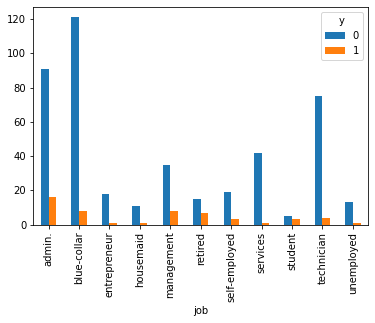

In [14]:
pd.crosstab(df.job,df.y).plot(kind='bar')
print("CrossTab : Job vs Y","\n","-"*85)
plt.savefig("Job_Y.png")

We can see here the job does not have much impact on the subscription

CrossTab : Marital vs Y 
 -------------------------------------------------------------------------------------


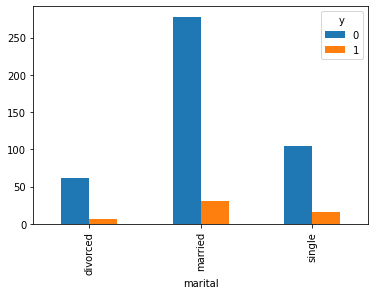

In [15]:
pd.crosstab(df.marital,df.y).plot(kind='bar')
print("CrossTab : Marital vs Y","\n","-"*85)

Here single people have more tendency towards subscription

CrossTab : Education vs Y 
 -------------------------------------------------------------------------------------


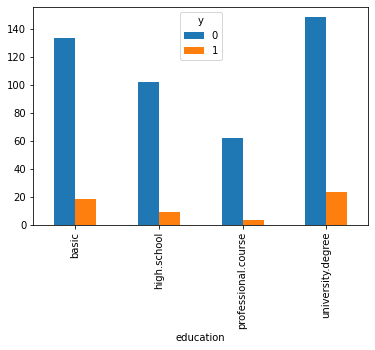

In [16]:
pd.crosstab(df.education,df.y).plot(kind='bar')
print("CrossTab : Education vs Y","\n","-"*85)

Also Education does not have much impact on the subscription

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

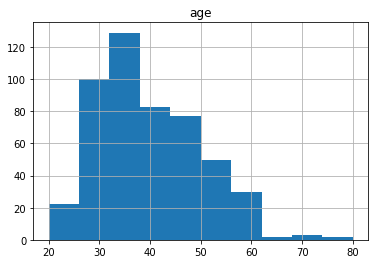

In [17]:
df.hist('age',bins=10)

Now creating bins for column AGE

In [18]:
bins=[20,30,40,50,60,70,80]
df.age_bins=pd.cut(df.age,bins)

<ipython-input-18-dcd307f66a5a>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.age_bins=pd.cut(df.age,bins)


CrossTab : Age vs Y 
 -------------------------------------------------------------------------------------


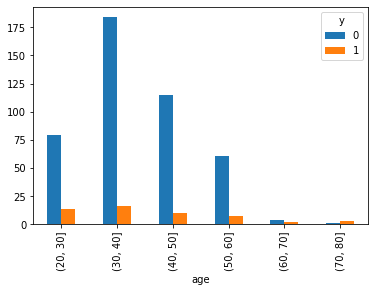

In [19]:
pd.crosstab(df.age_bins,df.y).plot(kind='bar')
print("CrossTab : Age vs Y","\n","-"*85)

As age increases number of subscription increases.
Retired people have more tendency towards subscription

CrossTab : Day_of_week vs Y 
 -------------------------------------------------------------------------------------


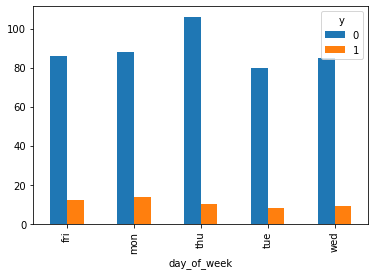

In [20]:
pd.crosstab(df.day_of_week,df.y).plot(kind='bar')
print("CrossTab : Day_of_week vs Y","\n","-"*85)

The day of week does not have any impact on Subscription.

CrossTab : Month vs Y 
 -------------------------------------------------------------------------------------


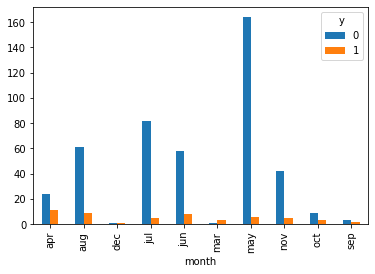

In [21]:
pd.crosstab(df.month,df.y).plot(kind='bar')
print("CrossTab : Month vs Y","\n","-"*85)

Decenber, March campaings have more success rates towards subscription.

CrossTab : Poutcome vs Y 
 -------------------------------------------------------------------------------------


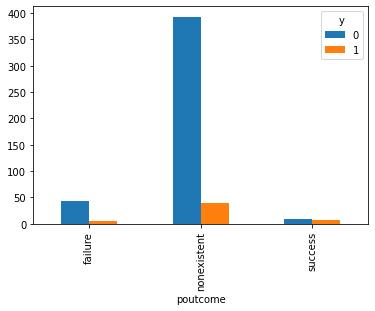

In [22]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
print("CrossTab : Poutcome vs Y","\n","-"*85)

In [23]:
# poutcome: outcome of the previous marketing campaign.

CrossTab : pdays vs Y 
 -------------------------------------------------------------------------------------


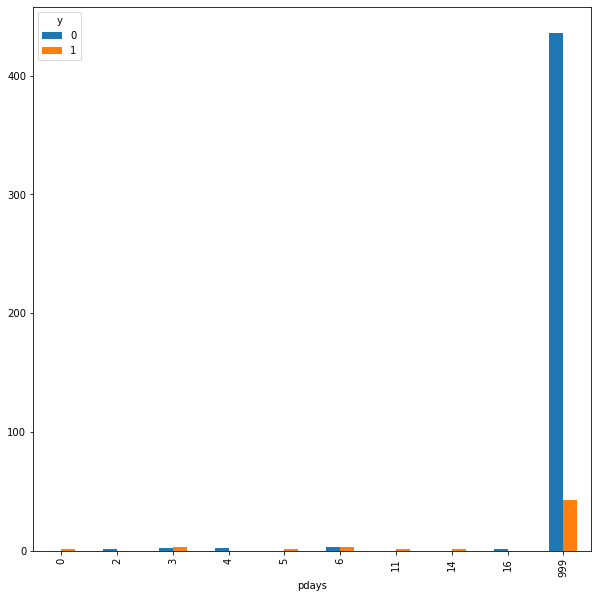

In [24]:
pd.crosstab(df.pdays,df.y).plot(kind='bar',figsize=(10,10))
print("CrossTab : pdays vs Y","\n","-"*85)

Here we see if any person is interested, he will subscribe after last contact within 14 days. After 15th day we can conclude that he was not interested to subscribe.

CrossTab : Campaign vs Y 
 -------------------------------------------------------------------------------------


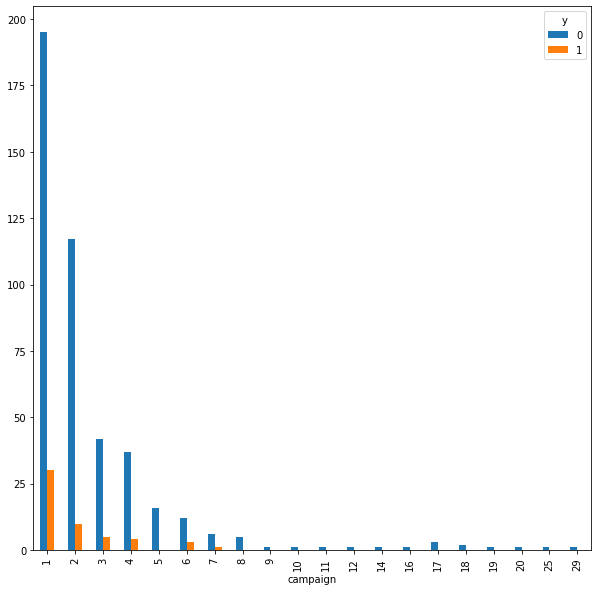

In [25]:
pd.crosstab(df.campaign,df.y).plot(kind='bar',figsize=(10,10))
print("CrossTab : Campaign vs Y","\n","-"*85)

#campaign: number of contacts performed during this campaign and for this client.
Here we can say there is no need to contact a person more than 10 days in a campaign (we can say he is not interested)


# Now we do Hot-coding for regression purpose.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             498 non-null    int64  
 1   job             498 non-null    object 
 2   marital         498 non-null    object 
 3   education       498 non-null    object 
 4   default         498 non-null    object 
 5   housing         498 non-null    object 
 6   loan            498 non-null    object 
 7   contact         498 non-null    object 
 8   month           498 non-null    object 
 9   day_of_week     498 non-null    object 
 10  duration        498 non-null    int64  
 11  campaign        498 non-null    int64  
 12  pdays           498 non-null    int64  
 13  previous        498 non-null    int64  
 14  poutcome        498 non-null    object 
 15  emp_var_rate    498 non-null    float64
 16  cons_price_idx  498 non-null    float64
 17  cons_conf_idx   498 non-null    flo

In [27]:
df=pd.get_dummies(df,columns=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]) 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            498 non-null    int64  
 1   duration                       498 non-null    int64  
 2   campaign                       498 non-null    int64  
 3   pdays                          498 non-null    int64  
 4   previous                       498 non-null    int64  
 5   emp_var_rate                   498 non-null    float64
 6   cons_price_idx                 498 non-null    float64
 7   cons_conf_idx                  498 non-null    float64
 8   euribor3m                      498 non-null    float64
 9   nr_employed                    498 non-null    float64
 10  y                              498 non-null    int64  
 11  job_admin.                     498 non-null    uint8  
 12  job_blue-collar                498 non-null    uin

# Regression Part

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x=df.drop(["y"],axis=1)
y=df["y"]

In [31]:
x.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [32]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=0) 

In [34]:
xtrain.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
141,39,102,1,999,0,1.4,94.465,-41.8,4.864,5228.1,...,0,0,0,0,0,1,0,0,1,0
381,30,160,1,999,0,1.4,93.444,-36.1,4.970,5228.1,...,0,0,0,1,0,0,0,0,1,0
135,29,14,5,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,1,0,0
491,37,596,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
122,31,98,8,999,0,1.4,93.444,-36.1,4.962,5228.1,...,0,0,0,0,1,0,0,0,1,0


In [35]:
ytrain.head()

141    0
381    0
135    0
491    0
122    0
Name: y, dtype: int64

In [36]:
xtest.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
90,40,160,1,999,0,-0.1,93.200,-42.0,4.245,5195.8,...,0,0,0,0,1,0,0,0,1,0
254,43,190,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,1,0,0,1,0
283,54,258,2,999,0,-2.9,92.963,-40.8,1.268,5076.2,...,0,0,1,0,0,0,0,0,1,0
443,44,292,1,999,0,1.4,93.918,-42.7,4.962,5228.1,...,0,0,0,1,0,0,0,0,1,0
336,39,76,4,999,0,1.4,93.918,-42.7,4.957,5228.1,...,0,0,1,0,0,0,0,0,1,0


In [37]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [38]:
lg.fit(xtrain,ytrain)

C:\Users\megha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
ypred=lg.predict(xtest)

In [40]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [42]:
confusion_matrix(ytest,ypred)

array([[131,   4],
       [ 10,   5]], dtype=int64)

In [43]:
accuracy_score(ytest,ypred)

0.9066666666666666

#Our model shows the accuracy of 90%